## Exploratory Data Analysis of Global Netflix Titles: Trends, Genres, and Regional Insights

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [243]:
pd.set_option('display.max_columns', None)  # Show all columns in DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in DataFrame

#### Loading Dataset

In [244]:
# dataset = https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download
df0 = pd.read_csv('netflix_titles.csv')
df0.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [245]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Data Cleaning

In [246]:
# Missing values
df0.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

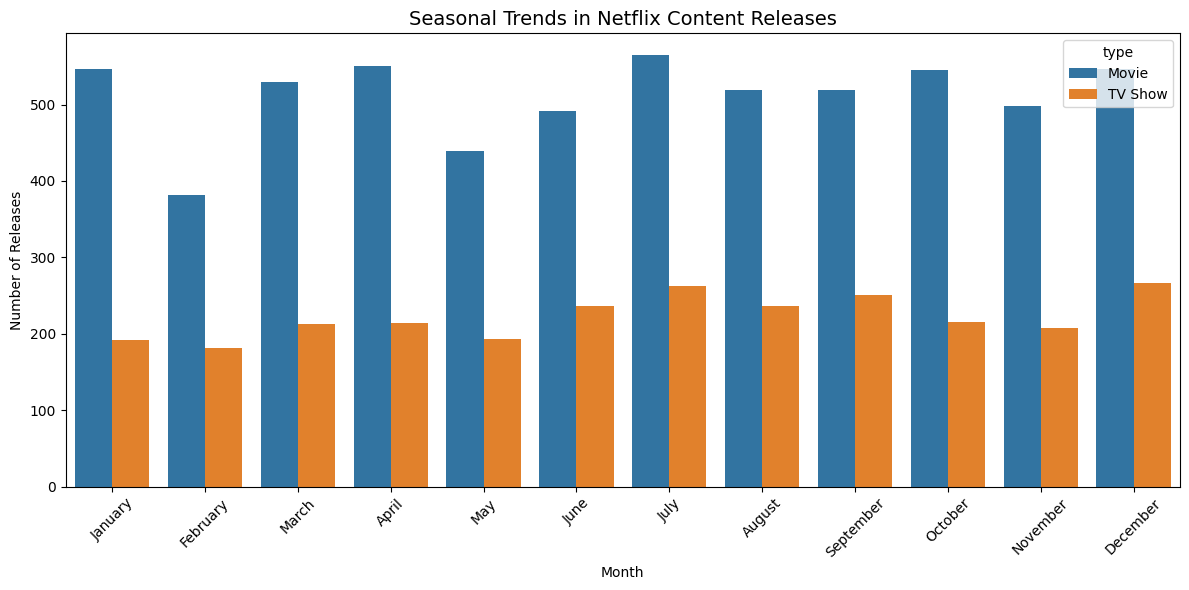

In [247]:
# Convert and clean dates
df0['date_added'] = pd.to_datetime(df0['date_added'].str.strip(), errors='coerce')

# Extract month name
df0['month_added'] = df0['date_added'].dt.month_name()

# Aggregate releases by type and month
monthly_counts = (
    df0.groupby(['month_added','type'])
       .size()
       .reset_index(name='count')
)

# Ensure chronological month order
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=monthly_counts,
    x="month_added", y="count", hue="type",
    order=month_order
)

plt.title("Seasonal Trends in Netflix Content Releases", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




C:\Users\cysd1\AppData\Local\Temp\ipykernel_12616\1921053182.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.assign(proportion=g['count'] / g['count'].sum()))


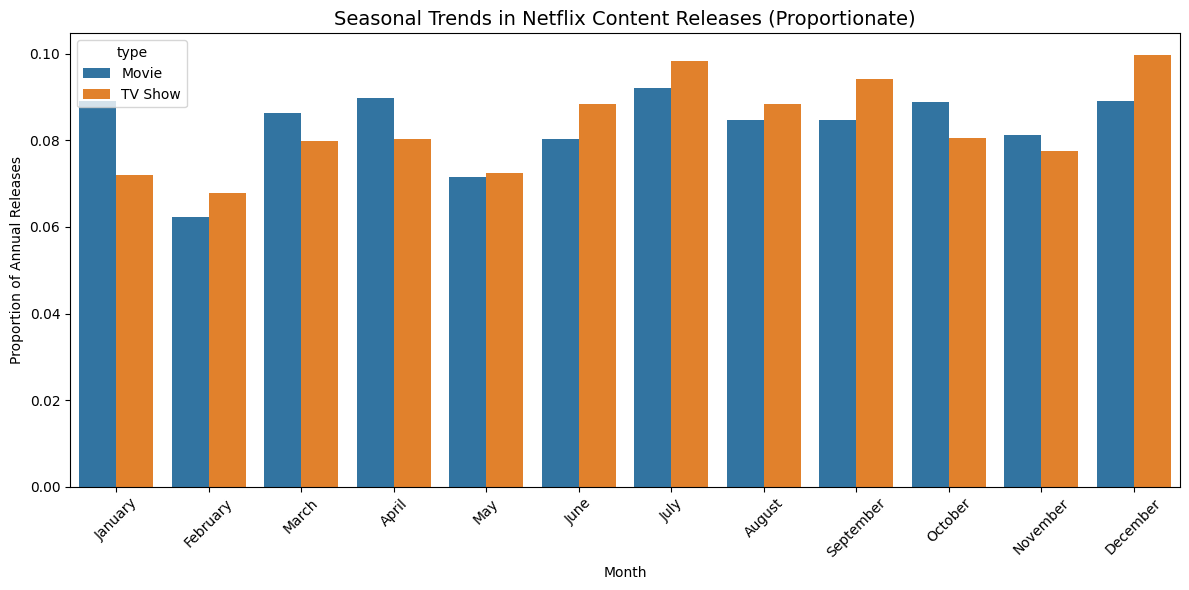

In [266]:
# Normalize counts within each type to proportions
monthly_counts_norm = (
    monthly_counts
    .groupby('type')
    .apply(lambda g: g.assign(proportion=g['count'] / g['count'].sum()))
    .reset_index(drop=True)
)

# Plot proportionate seasonal trends
plt.figure(figsize=(12,6))
sns.barplot(
    data=monthly_counts_norm,
    x="month_added", y="proportion", hue="type",
    order=month_order
)

plt.title("Seasonal Trends in Netflix Content Releases (Proportionate)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Proportion of Annual Releases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


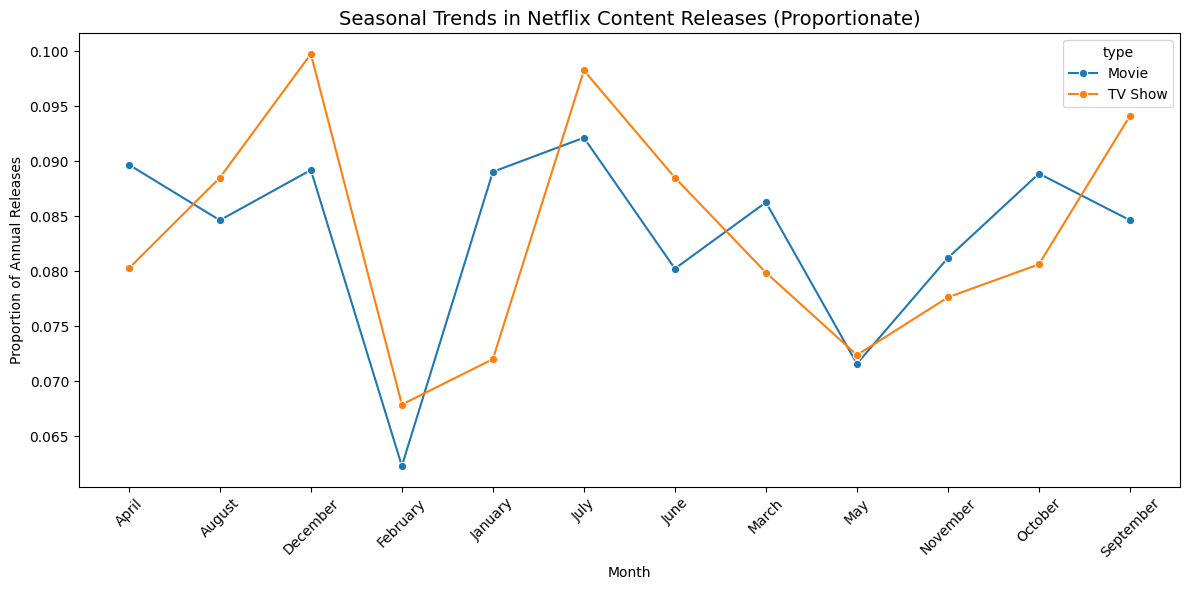

<Figure size 640x480 with 0 Axes>

In [ ]:
# Line chart for seasonal comparison
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_counts_norm,
    x="month_added", y="proportion", hue="type",
    hue_order=["Movie","TV Show"], marker="o"
)

plt.title("Seasonal Trends in Netflix Content Releases (Proportionate)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Proportion of Annual Releases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [248]:
# Fill missing values in country with 'Unknown'
df0['country'] = df0['country'].fillna('Unknown')

In [249]:
# Drop Lingering Missing Values
df0.dropna(subset=['date_added'], inplace=True)
df0.dropna(subset=['rating'], inplace=True)
df0.dropna(subset=['duration'], inplace=True)
df0.dropna(subset=['director'], inplace=True)
df0.dropna(subset=['cast'], inplace=True)


#### Univariate Analysis

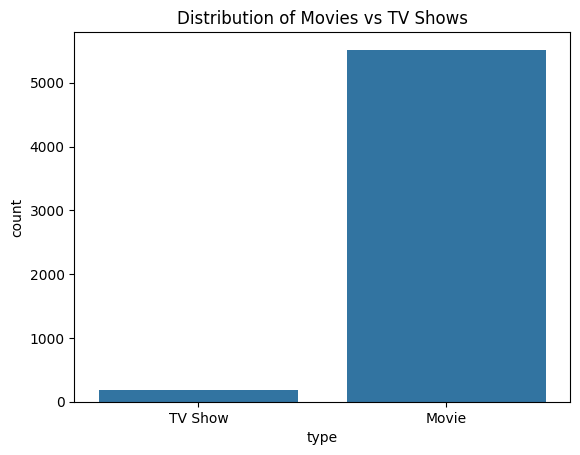

<Figure size 640x480 with 0 Axes>

In [250]:
# Movies vs TV Shows distribution
sns.countplot(data=df0, x="type")
plt.title("Distribution of Movies vs TV Shows")
plt.show()
plt.savefig("images/movies_vs_tvshows.png")

In [251]:
df0["type"].value_counts(normalize=True)*100

type
Movie      96.875
TV Show     3.125
Name: proportion, dtype: float64

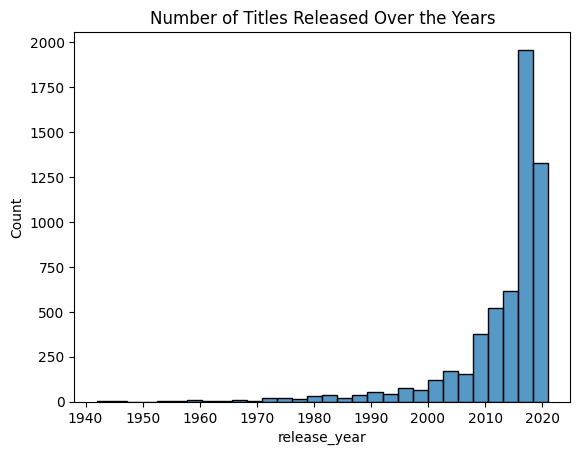

<Figure size 640x480 with 0 Axes>

In [252]:
# Distribution of Release Years
sns.histplot(df0['release_year'], bins=30, kde=False)
plt.title("Number of Titles Released Over the Years")
plt.show()
plt.savefig("images/releases_over_time.png")

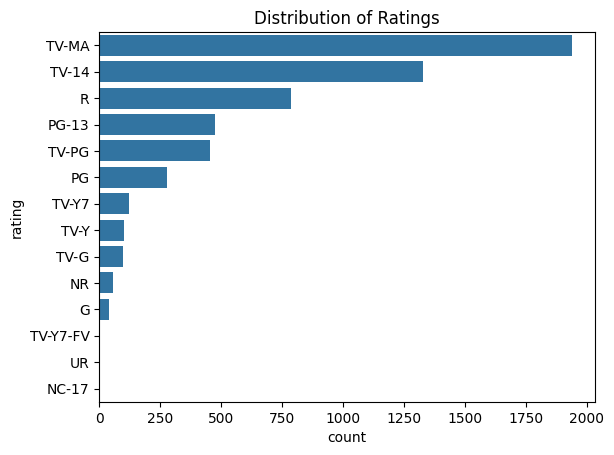

In [253]:
# Ratings distribution
sns.countplot(y="rating", data=df0, order=df0['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()

#### Bivariate Analysis

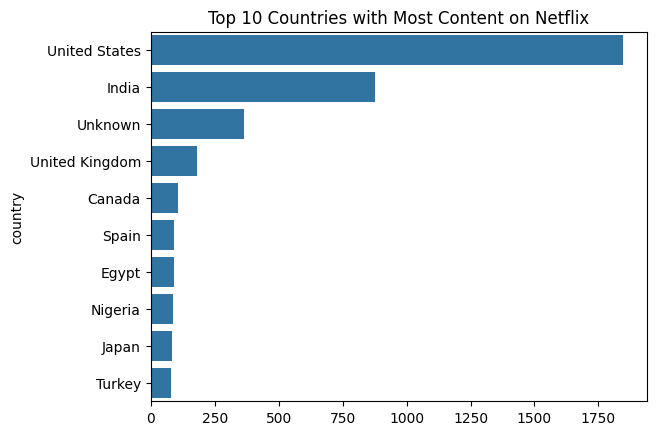

<Figure size 640x480 with 0 Axes>

In [254]:
# Top 10 countries producing content
top_countries = df0['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Content on Netflix")
plt.show()
plt.savefig("images/top_countries.png")

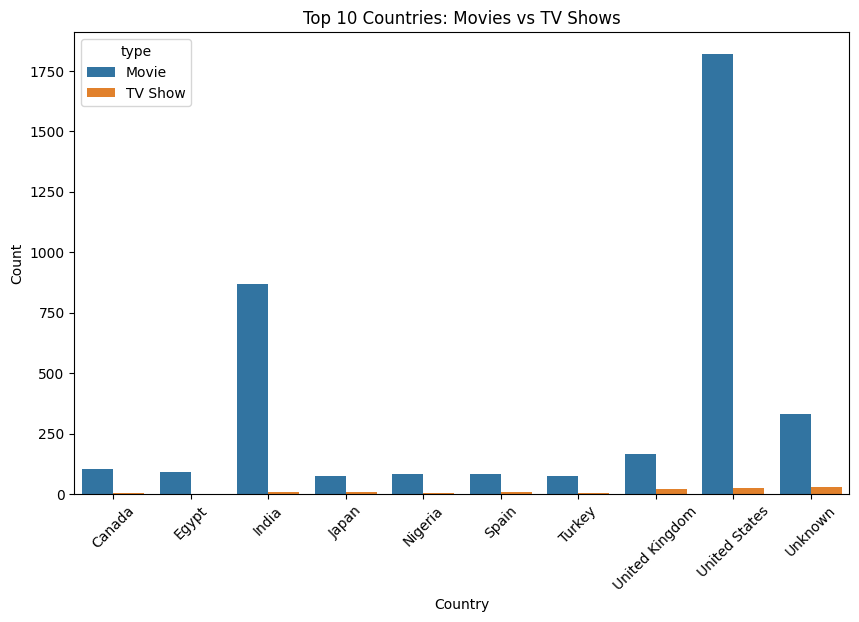

In [255]:
# Get top 10 countries overall
top_countries = (
    df0["country"]
    .value_counts()
    .head(10)
    .index
)

# Filter only those countries
country_dist = (
    df0[df0["country"].isin(top_countries)]
    .groupby(["type", "country"])
    .size()
    .reset_index(name="count")
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=country_dist, x="country", y="count", hue="type")

plt.title("Top 10 Countries: Movies vs TV Shows")
plt.ylabel("Count")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


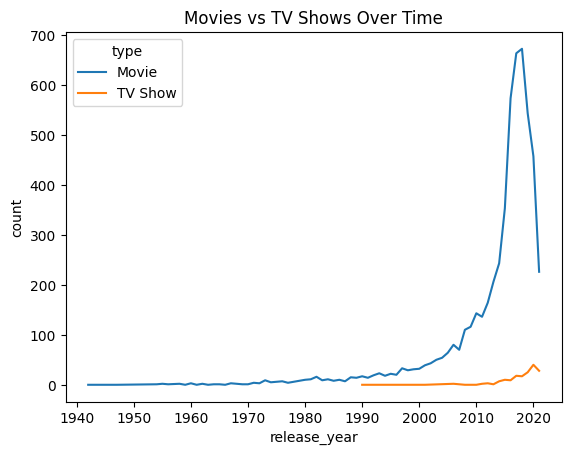

In [256]:
# Movies vs TV Shows over time
content_trend = df0.groupby(['release_year', 'type']).size().reset_index(name='count')
sns.lineplot(data=content_trend, x="release_year", y="count", hue="type")
plt.title("Movies vs TV Shows Over Time")
plt.show()

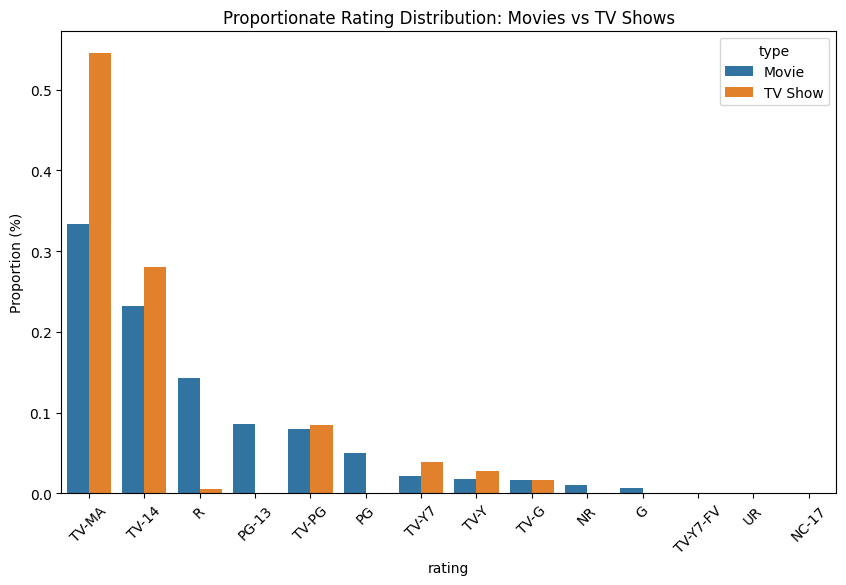

<Figure size 640x480 with 0 Axes>

In [257]:
# Movies vs TV Shows Ratings

rating_dist = (
    df0.groupby("type")["rating"]
      .value_counts(normalize=True)   # proportions
      .rename("proportion")
      .reset_index()
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=rating_dist, x="rating", y="proportion", hue="type")

plt.title("Proportionate Rating Distribution: Movies vs TV Shows")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45)
plt.show()
plt.savefig("images/movies_vs_tvshows_ratings.png")

#### Genre Analysis

In [258]:
! pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\cysd1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [259]:
from wordcloud import WordCloud as wc

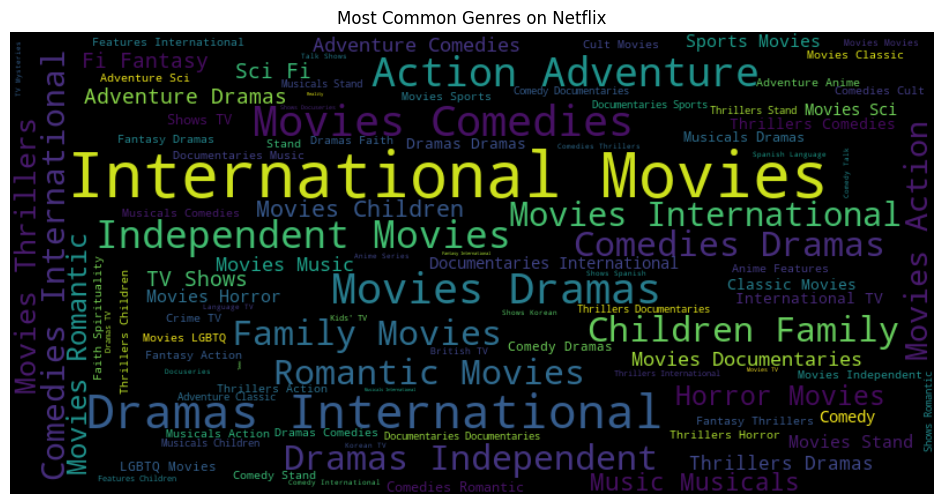

<Figure size 640x480 with 0 Axes>

In [260]:
all_genres = " ".join(df0['listed_in'].dropna().astype(str))
wordcloud = wc(width=800, height=400, background_color="black").generate(all_genres)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Genres on Netflix")
plt.show()
plt.savefig("images/genres_wordcloud.png")

#### Duration Analysis

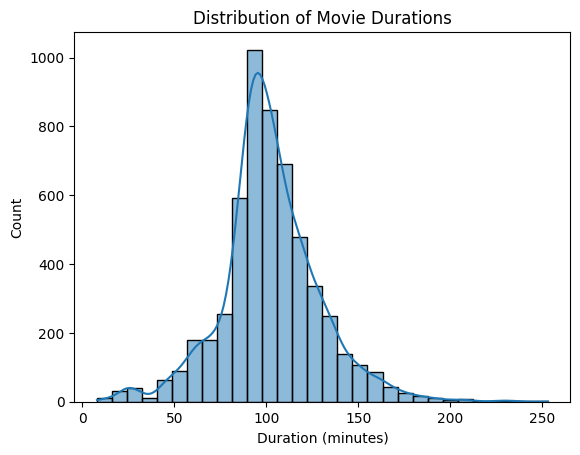

<Figure size 640x480 with 0 Axes>

In [261]:
# Movie durations
movie_df = df0[df0['type'] == "Movie"].copy()
movie_df['duration'] = movie_df['duration'].str.replace(" min", "").astype(float)

sns.histplot(movie_df['duration'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()
plt.savefig("images/movie_durations.png")

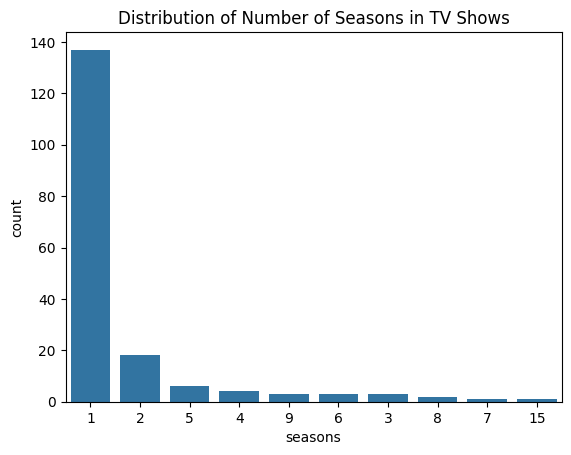

<Figure size 640x480 with 0 Axes>

In [262]:
# TV Show seasons
tv_df = df0[df0['type'] == "TV Show"].copy()
tv_df['seasons'] = tv_df['duration'].str.replace(" Season", "").str.replace("s", "").astype(int)

sns.countplot(x="seasons", data=tv_df, order=tv_df['seasons'].value_counts().index)
plt.title("Distribution of Number of Seasons in TV Shows")
plt.show()
plt.savefig("images/tvshow_seasons.png")

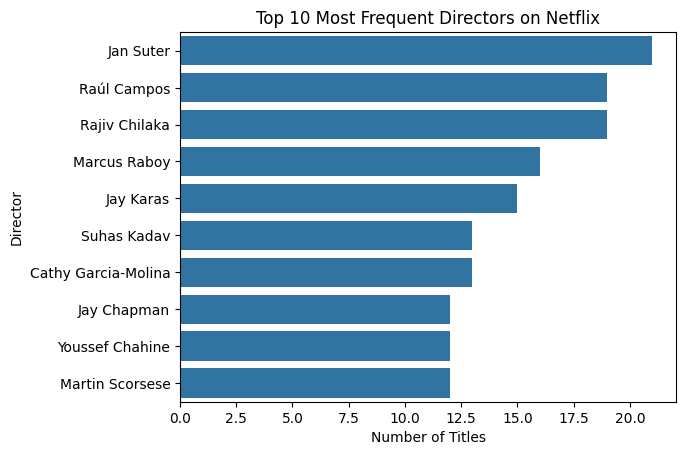

In [263]:
# Top 10 Directors

# Drop missing cast values
director_df = df0.dropna(subset=['director'])

# Split comma-separated actors into separate rows
director_series = director_df['director'].str.split(',').explode().str.strip()

# Count actor frequencies
top_director = director_series.value_counts().head(10)

# Plot
sns.barplot(x=top_director.values, y=top_director.index, legend=False)
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()



In [264]:
df0['director'].value_counts().head(10)

director
Raúl Campos, Jan Suter    18
Rajiv Chilaka             17
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Suhas Kadav               13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Name: count, dtype: int64

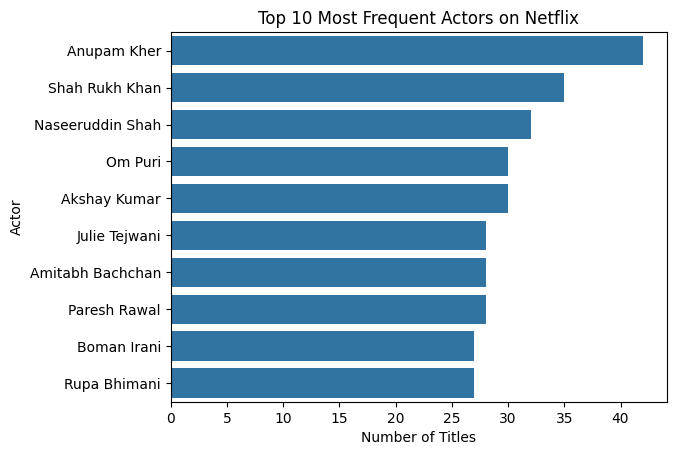

<Figure size 640x480 with 0 Axes>

In [265]:
# Top 10 Actors

# Drop missing cast values
actors_df = df0.dropna(subset=['cast'])

# Split comma-separated actors into separate rows
actors_series = actors_df['cast'].str.split(',').explode().str.strip()

# Count actor frequencies
top_actors = actors_series.value_counts().head(10)

# Plot
sns.barplot(x=top_actors.values, y=top_actors.index, legend=False)
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

plt.savefig("images/top_actors.png")


#### Key Insights

1. Movies vs TV Shows:

    - The number of movies produced is significantly higher than TV Shows. This can be especially verified considering the production of movies has been going on for a far longer time as compared to TV shows.
    - TV Shows are highly concentrated in mature ratings — over 50% are TV-MA and nearly 30% TV-14, reflecting Netflix’s focus on adult and teen-oriented series.
    - Movies have a more balanced spread across ratings, including R, PG-13, PG, and G, suggesting they are designed to reach a wider audience base.
    - Family/Kids content (PG, G, TV-Y, TV-Y7) is primarily delivered through Movies, while TV Shows contribute very little here.

**Takeaway:** Overall, Netflix positions TV Shows for mature/teen audiences, while Movies serve a broad spectrum — from kids to adults.

2. Countries Producing Most Content on Netflix

    - The United States and India are leading the charts in terms of producing most number of movies, and, the United States and United Kingdom produce the highest number of TV Shows

3. Most Common Genres

    - International Movies, Dramas, and Comedies are the most common genres, showing Netflix’s focus on global content.

    - Children & Family Movies and Independent Movies are also highly prominent, highlighting diversity in audience targeting.

    - Action, Adventure, and Horror Movies dominate film categories, while TV Dramas and Romantic genres also stand out.

    - The platform balances mainstream genres (Comedy, Action, Drama) with niche categories (Documentaries, LGBTQ, Faith, Musicals), showing broad inclusivity.

4. Patterns in Movie Durations and Number of Seasons for TV Shows

    - Movies (Durations)

        - Most movies are between 90–110 minutes, reflecting a standard feature-film length.

        - The distribution is right-skewed: while a few movies exceed 150 minutes, they are uncommon.

        - Short films (<60 minutes) exist but form a small fraction compared to the ~100 min norm.

    - TV Shows (Seasons)

        - The majority of shows on Netflix have only 1 season, showing a preference for short or limited series.

        - There is a sharp decline after 2 seasons, with very few shows running beyond 3–5 seasons.

        - Long-running shows (7+ seasons) are extremely rare in the catalog.

**Takeaway:** Netflix’s catalog is dominated by standard-length movies (~100 min) and short/limited TV series.

5. Seasonal Trends in Content Release Date

    - December is the peak month for both movies and TV shows, driven by holiday demand.

    - TV shows spike mid-year (June–September), matching summer binge-watching trends.

    - Movies release more evenly across months with smaller seasonal swings.

    - February and May are the weakest months for new content releases.

    - Netflix uses movies for steady growth and TV shows for seasonal engagement boosts.

6. Top Directors and Actors in Netflix

    - Directors

        - Jan Suter leads with the highest number of Netflix titles.

        - Mexican and Indian directors (e.g., Raúl Campos, Rajiv Chilaka, Suhas Kadav) have a strong presence.

        - The list reflects Netflix’s focus on regional diversity in content.

    - Actors

        - Anupam Kher dominates with 40+ Netflix titles.

        - Bollywood legends like Shah Rukh Khan, Amitabh Bachchan, Akshay Kumar, and Naseeruddin Shah feature prominently.

        - The dominance of Indian actors highlights Netflix’s deep investment in Bollywood and Indian cinema.

**Overall:** Netflix’s library heavily features Indian talent among actors and directors, while directors show broader international diversity.